In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import display_eval, plot_reward_comparison, analyze_protein_gen_helper

In [4]:
pretrained_file = 'data/baseline_data/distribution/original_old_10_0.5_0_results_merge.csv' 
drakes_file = 'data/baseline_data/distribution/original_new_10_0.5_0_results_merge.csv' 
df_pre = pd.read_csv(pretrained_file)
df_drakes = pd.read_csv(drakes_file)

print("---Pretrained---")
pre_stats = display_eval(df_pre)
print()
print("-----DRAKES-----")
drakes_stats = display_eval(df_drakes)

---Pretrained---
Pred-ddG (median)↑: -0.507
%(ddG > 0) (%)↑: 36.7
scRMSD (median)↓: 0.834
%(scRMSD < 2)(%)↑: 90.0
Success Rate (%)↑: 34.4

-----DRAKES-----
Pred-ddG (median)↑: 1.084
%(ddG > 0) (%)↑: 86.6
scRMSD (median)↓: 0.913
%(scRMSD < 2)(%)↑: 92.4
Success Rate (%)↑: 79.4


In [5]:
beam_10_new_fn = 'data/beam_data/trajectory/diffusion_analysis_new_7JJK_beam_10_test.csv'
beam_10_old_fn = 'data/beam_data/trajectory/diffusion_analysis_old_7JJK_beam_10_test.csv'
bon_10_new_fn = 'data/bon_data/trajectory/diffusion_analysis_new_7JJK_bon_10_test.csv'
bon_10_old_fn = 'data/bon_data/trajectory/diffusion_analysis_old_7JJK_bon_10_test.csv'
base_new_fn = 'data/baseline_data/trajectory/diffusion_analysis_new_7JJK.csv'
base_old_fn = 'data/baseline_data/trajectory/diffusion_analysis_old_7JJK.csv'

In [6]:
beam_10_new_df = pd.read_csv(beam_10_new_fn)
beam_10_old_df = pd.read_csv(beam_10_old_fn)
bon_10_new_df = pd.read_csv(bon_10_new_fn)
bon_10_old_df = pd.read_csv(bon_10_old_fn)
base_new_df = pd.read_csv(base_new_fn)
base_old_df = pd.read_csv(base_old_fn)

In [7]:
beam_10_new_r = beam_10_new_df['Reward Average']
beam_10_old_r = beam_10_old_df['Reward Average']
bon_10_new_r = bon_10_new_df['Reward Average']
bon_10_old_r = bon_10_old_df['Reward Average']
base_new_r = base_new_df['Reward Average']
base_old_r = base_old_df['Reward Average']

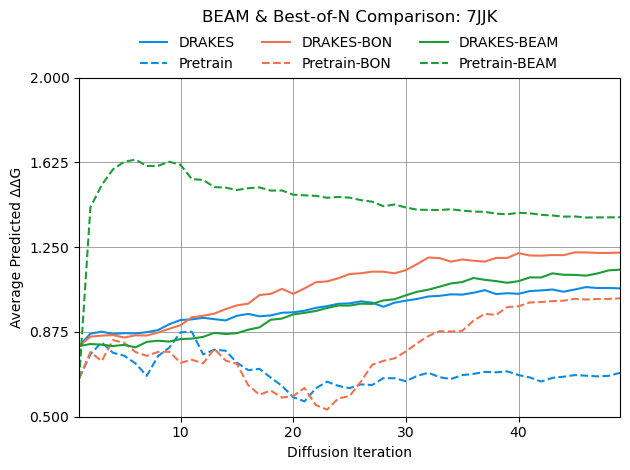

In [31]:
iterations = np.arange(len(base_old_r)) + 1
all_reward = [base_new_r, base_old_r,  bon_10_new_r, bon_10_old_r, beam_10_new_r, beam_10_old_r]
colors = ['#0C8CE1', '#0C8CE1', '#F0724F', '#F0724F', '#1C9D36', '#1C9D36']
#colors = ['#0C8CE1', '#0C8CE1', '#8C33EB', '#8C33EB', '#6CA783', '#6CA783']
linestyles = ['-', '--', '-', '--', '-', '--']
labels = ['DRAKES', 'Pretrain', 'DRAKES-BON', 'Pretrain-BON', 'DRAKES-BEAM', 'Pretrain-BEAM']
title = 'BEAM & Best-of-N Comparison: 7JJK'

plot_reward_comparison(iterations, all_reward, colors, linestyles, labels, title)

In [20]:
beam_10_1_new_fn = base_old_fn
beam_10_5_new_fn = base_old_fn
beam_10_10_new_fn = base_old_fn

In [21]:
beam_10_1_new_df = pd.read_csv(beam_10_1_new_fn)
beam_10_5_new_df = pd.read_csv(beam_10_5_new_fn)
beam_10_10_new_df = pd.read_csv(beam_10_10_new_fn)

In [22]:
beam_10_1_new_r = beam_10_1_new_df['Reward Average']
beam_10_5_new_r = beam_10_5_new_df['Reward Average']
beam_10_10_new_r = beam_10_10_new_df['Reward Average']

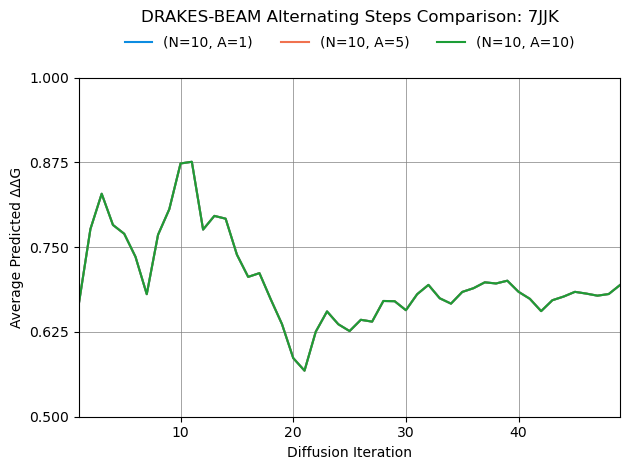

In [25]:
iterations = np.arange(len(beam_10_1_new_r)) + 1
all_reward = [beam_10_1_new_r, beam_10_5_new_r, beam_10_10_new_r]
colors = ['#0C8CE1', '#F0724F', '#1C9D36']
linestyles = ['-', '-', '-']
labels = ['(N=10, A=1)', '(N=10, A=5)', '(N=10, A=10)']
title = 'DRAKES-BEAM Alternating Steps Comparison: 7JJK'

plot_reward_comparison(iterations, all_reward, colors, linestyles, labels, title)

In [27]:
soft_beam_10_1_new_fn = 'data/beam_data/trajectory/diffusion_analysis_new_7JJK_soft_beam_10.csv'
soft_beam_10_1_new_df = pd.read_csv(soft_beam_10_1_new_fn)
soft_beam_10_1_new_r = soft_beam_10_1_new_df['Reward Average']

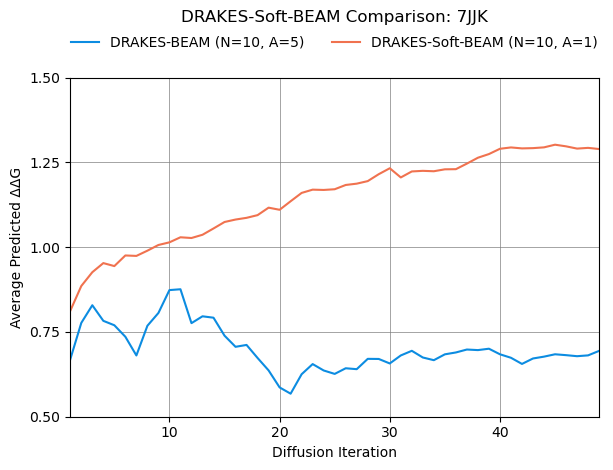

In [29]:
iterations = np.arange(len(beam_10_1_new_r)) + 1
all_reward = [beam_10_1_new_r, soft_beam_10_1_new_r]
colors = ['#0C8CE1', '#F0724F']
linestyles = ['-', '-']
labels = ['DRAKES-BEAM (N=10, A=5)', 'DRAKES-Soft-BEAM (N=10, A=1)']
title = 'DRAKES-Soft-BEAM Comparison: 7JJK'

plot_reward_comparison(iterations, all_reward, colors, linestyles, labels, title)